<a href="https://colab.research.google.com/github/victoriamaina/Supervised-learning/blob/main/A_prediction_result_of_a_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly **

By 
Victoria Maina



## **1. Defining the Question**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### a) Specifying the Question

The research problem is to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.



### b) Defining the Metric for Success

This analysis requires us to come up with a solution that will accurately predict the winning team based on the two factors:

   a)Home team or away team

   b)The type of tournament 

2)Have the lowest RMSE score possible




### c) Understanding the context 

>


### d) Recording the Experimental Design

> The following steps were taken:

1. Business Understanding
2. Reading the data
3. Checking our data
4. Data cleaning
5. Merging datasets
6. Performing EDA
7. Feature Engineering
8. Polynomial Regression
9. Logistic regression
10. Computing the RMSE
11. Plotting residual plots
12. Assess their heteroscedasticity using Barlette's test
13. Challenging the solution
14. Conclusion


### e) Data Relevance

Datasets Provided:

 fifa ranking and results dataset [Link](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view)

## **2. Reading the Data**

In [331]:
# Importing the libraries we will need 

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Dataset from our CSV file

In [332]:
#loading  fifa ranking  dataset
fifa=pd.read_csv("/content/fifa_ranking.csv", parse_dates=['rank_date'])
#previewing the dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [333]:
#checking the tail
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


## **3. Data Understanding**

In [334]:
#getting the info
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

Our dataset comprises of object,float and integer data types.

In [335]:
#checking the columns
#
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

We have 16 columns as shown above.

In [336]:
#Getting the shape
#
fifa.shape

(57793, 16)

the dataset has 57793 records and 16 variables

In [337]:
#getting basic statistical details
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


The count,mean,std,min,max and quartiles are shown above.

In [338]:
#getting the number unique values in each column
fifa.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

These are the number of unique values in each column.

In [339]:
#checking for missing values
fifa.isnull().sum().sum()

0

There are no missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

[link text](https://)### 4.1 Completeness

In [340]:
#checking for null values across each column
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

### 4.2 Validity

In [341]:
#Irrelevant Data
#Drop columns we do not need.
#
fifa=fifa.drop(['country_abrv','previous_points','total_points','rank_change','cur_year_avg', 'cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis = 1)

The unneccessary columns are dropped.

In [342]:
# Replacing spaces in the column names with underscore
fifa.columns=fifa.columns.str.replace(" ", "_")

To make our columns look neater.

In [343]:
# Changing column names to lower case
fifa.columns= fifa.columns.str.lower()


In [344]:
fifa.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [345]:
# Separate the date column into Year and Month of the fifa_ranking dataset
fifa['Year'] = fifa.rank_date.dt.year
fifa['month'] =fifa.rank_date.dt.month
fifa.head()

,rank,country_full,confederation,rank_date,Year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [346]:
#renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank
fifa.home = fifa.rename({'country_full': 'home_team'}, axis = 1)
fifa.columns

Index(['rank', 'country_full', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')

In [347]:
#renaming the country_full column to home_team to merge with the results dataset and obtain the away team rank
fifa.away = fifa.rename({'country_full': 'away_team'}, axis = 1)
fifa.columns

Index(['rank', 'country_full', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')

##RESULTS DATASET 

In [348]:
# Loading the FiFa results Dataset while specifying the datetime column
results = pd.read_csv('/content/results.csv',parse_dates=['date'])
results.head(5)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [349]:
#checking the tail
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [350]:
#getting the info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [351]:
#checking the columns
#
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [352]:
#Getting the shape
#
results.shape

(40839, 9)

In [353]:
#getting basic statistical details
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [354]:
#getting the number unique values in each column
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [355]:
#checking for missing values
results.isnull().sum().sum()

0

## ** Data Cleaning**

### 4.1 Completeness


In [356]:
#checking for null values across each column
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

### 4.2 Validity

In [357]:
#Irrelevant Data
#Drop columns we do not need.
#
results=results.drop(['city'], axis = 1)

In [358]:
# Replacing spaces in the column names with underscore
results.columns=results.columns.str.replace(" ", "_")

In [359]:
# Changing column names to lower case
results.columns= results.columns.str.lower()


In [360]:
results

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False
...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True


In [361]:
#checking for duplicates
results.duplicated().sum()

0

In [362]:
#checking for anomalies
#the results dataset has records before 1993 which we will drop since there are no corresponding records
#in the ranking dataset
results['date'].describe()

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [363]:
#dropping the row entries before 1993 since they do not have corresponding records 
#in the ranking  dataframe.
results_1 = results
results_1 = results[results["date"] > '1993-01-01']
results_1.shape
#dropped 40839-23477 = 17362 row entries

(23477, 8)

In [364]:
results_1['Year'] = results_1.date.dt.year
results_1['month'] =results_1.date.dt.month
results_1.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1


### 4.3 Consistency

In [365]:
#checking for duplicates
results.duplicated().sum()

0

There are 0 duplicates.

In [366]:
results.shape

(40839, 8)

### 4.4 Uniformity

In [367]:
#no action was done

### 4.5 Accuracy

In [368]:
#no action was done

##Merging datasets

In [369]:
## Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
home = pd.merge(results_1, fifa.home, how='left', on = ['home_team', 'Year', 'month'])
home.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [370]:
home = home.rename({'rank': 'home_team_rank'}, axis = 1)
home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [371]:
## Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
away = pd.merge(results_1, fifa.away, how='left', on = ['away_team', 'Year', 'month'])
away.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [372]:
away = away.rename({'rank': 'away_team_rank'}, axis = 1)
away.head(5)


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,away_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [373]:
fifa_ranking_results = pd.merge(home,away, how = 'inner', left_on = ['Year', 'month','away_team'], right_on = ['Year', 'month','away_team'])
fifa_ranking_results

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_team_rank,confederation_y,rank_date_y
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,1993-01-02,Gabon,1,1,Friendly,Gabon,False,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT,1993-01-02,Kuwait,2,0,Friendly,Kuwait,False,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT,1993-01-03,Burkina Faso,1,0,Friendly,Gabon,True,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,1993-01-03,Gabon,2,3,Friendly,Gabon,False,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT,1993-01-08,Uganda,3,1,Friendly,Uganda,False,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41427,2019-07-14,Algeria,Nigeria,2,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-14,Algeria,2,1,African Cup of Nations,Egypt,True,NaN,NaN,NaT
41428,2019-07-14,Algeria,Nigeria,2,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-17,Tunisia,0,1,African Cup of Nations,Egypt,True,NaN,NaN,NaT
41429,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-14,Algeria,2,1,African Cup of Nations,Egypt,True,NaN,NaN,NaT
41430,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-17,Tunisia,0,1,African Cup of Nations,Egypt,True,NaN,NaN,NaT


In [374]:
##dropping columns that will not be needed
fifa_ranking_results = fifa_ranking_results.drop(['confederation_x', 'rank_date_x', 'date_y', 'home_team_y', 'home_score_y', 'away_score_y', 'tournament_y', 'country_y', 'neutral_y', 'confederation_y', 'rank_date_y','date_x'], axis=1)
fifa_ranking_results

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,away_team_rank
0,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN
1,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN
2,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN
3,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN
4,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
41427,Algeria,Nigeria,2,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN
41428,Algeria,Nigeria,2,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN
41429,Tunisia,Nigeria,0,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN
41430,Tunisia,Nigeria,0,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN


In [375]:
fifa_ranking_results.isnull().sum()

home_team_x          0
away_team            0
home_score_x         0
away_score_x         0
tournament_x         0
country_x            0
neutral_x            0
Year                 0
month                0
home_team_rank    9678
away_team_rank    9897
dtype: int64

In [376]:
fifa_ranking_results.shape

(41432, 11)

In [377]:
FIFA=fifa_ranking_results.dropna()
FIFA.isnull().sum()
FIFA.shape

(28518, 11)

# Exporting our new Dataset

In [378]:
FIFA1=FIFA.copy(deep=True)

In [379]:
#creating a column(final_score) that shows whether the match ended in a win, loss or draw
FIFA['FINAL_SCORE'] = FIFA['home_score_x'] - FIFA['away_score_x']
def HOME_TEAM(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
FIFA['outcome'] = FIFA.FINAL_SCORE.apply(lambda h: HOME_TEAM(h))
FIFA.head(5)


,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,away_team_rank,FINAL_SCORE,outcome
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0,0,Draw
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0,0,Draw
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0,0,Draw
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0,0,Draw
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,5.0,-1,Loss


## **5. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of central Tendacies

In [380]:
from numpy.ma.core import append
numerical_columns=['home_score_x','away_score_x','Year']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(FIFA[column].mean()))
  print(column + ', Mode:' + str(FIFA[column].mode()))
  print(column + ', Median: ' + str(FIFA[column].median()))



home_score_x, Mean: 1.5955887509643032
home_score_x, Mode:0    1
dtype: int64
home_score_x, Median: 1.0


away_score_x, Mean: 1.1009888491479065
away_score_x, Mode:0    0
dtype: int64
away_score_x, Median: 1.0


Year, Mean: 2006.1966827968301
Year, Mode:0    2000
dtype: int64
Year, Median: 2006.0


#### Measures of dispersion

In [381]:
from numpy.ma.core import append
numerical_columns=['Year','home_score_x','away_score_x']
for column in numerical_columns:
  print('\n')
  print(column + ', Variance: '+str (FIFA[column].var()))
  print(column + ', Standard deviation:' + str(FIFA[column].std()))
  print(column + ', Skewness: ' + str(FIFA[column].skew()))
  print(column + ', Kurtosis: ' + str(FIFA[column].kurt()))
  print(column + ', Quartiles: ' + str(FIFA[column].quantile([0.25,0.5,0.75])))



Year, Variance: 46.82125771268188
Year, Standard deviation:6.8426060614857755
Year, Skewness: -0.05077353203822851
Year, Kurtosis: -1.128867125789785
Year, Quartiles: 0.25    2000.0
0.50    2006.0
0.75    2012.0
Name: Year, dtype: float64


home_score_x, Variance: 2.6708603662688666
home_score_x, Standard deviation:1.6342767104345783
home_score_x, Skewness: 2.5416698908316224
home_score_x, Kurtosis: 17.96326652848035
home_score_x, Quartiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score_x, dtype: float64


away_score_x, Variance: 1.6350651230657671
away_score_x, Standard deviation:1.278696650134725
away_score_x, Skewness: 1.9619670077040905
away_score_x, Kurtosis: 7.126838217373229
away_score_x, Quartiles: 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score_x, dtype: float64


#### Bar Graphs

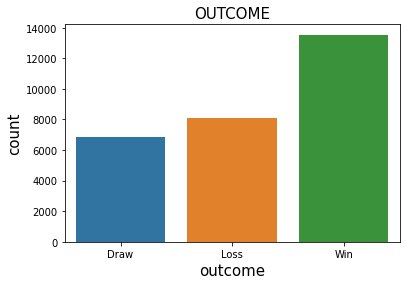

In [382]:
#creating a bar graph of the years with the largest records
#
sb.countplot(FIFA['outcome'])
plt.title('OUTCOME',fontsize=15)
plt.xlabel("outcome",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

### Bivariate Analysis

#### Heat Map

In [383]:
#this is a summary analysis of the correlation coefficients in the datasets

corr =FIFA[['home_score_x','away_score_x','home_team_rank','away_team_rank' ]].corr()

corr.style.background_gradient(cmap='coolwarm')

,home_score_x,away_score_x,home_team_rank,away_team_rank
home_score_x,1.000000,-0.160963,-0.115309,0.307034
away_score_x,-0.160963,1.000000,0.221202,-0.151864
home_team_rank,-0.115309,0.221202,1.000000,0.514813
away_team_rank,0.307034,-0.151864,0.514813,1.000000


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.



##Checking for multicollinearity

In [384]:
#computing the VIF(which is the inverse of the correlation matrix)
#
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif_df


,home_score_x,away_score_x,home_team_rank,away_team_rank
home_score_x,1.243723,0.004333,0.460841,-0.618454
away_score_x,0.004333,1.169625,-0.474827,0.420740
home_team_rank,0.460841,-0.474827,1.725432,-1.101877
away_team_rank,-0.618454,0.420740,-1.101877,1.821042


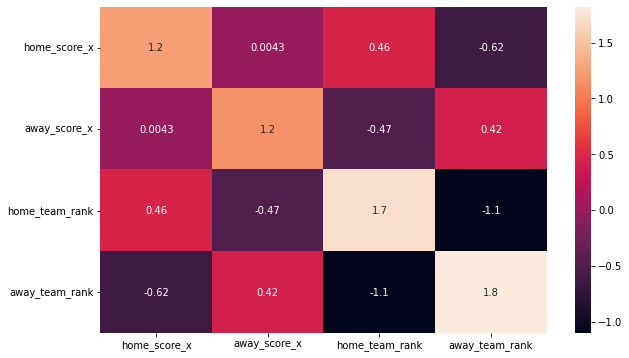

In [385]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sb.heatmap(vif_df, annot = True)
plt.show()

The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity or no multicollinearity

Polynomial Regression

In [386]:
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error
# Creating X and y variables
#
X = FIFA.iloc[:, [0, 1, 3, 4, 5, 6]]
y = FIFA.home_score_x

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)
residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.3213754385857825
The residual mean score for the model :  0.0027922995461655198


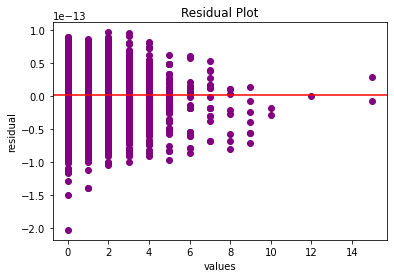

In [395]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='purple')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()


In [389]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = FIFA.iloc[:, [0,1,2,8,9,10,11,12]]
y = FIFA['away_score_x'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  3.819976768886518e-14
The residual mean score for the model :  9.169872157435137e-16


With lower rmse shows the model fits


In [392]:
# Testing my model with several classiffiers to see the better classifier
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
#classifier.append(('SVM ', SVC(gamma='auto')))

res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=None)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
## We can see that logistic reggresion has the highest accuracy.
## thus we use it for classification modelling


Logistic Regression : 0.783204 (0.006013)
Random Forest : 0.978478 (0.003377)
GussianNB : 0.141317 (0.004012)


Bartletts test

In [393]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


 The features are independent.

Logistic Regression

In [407]:
# Splitting the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression
X = FIFA.drop('home_score_x', axis = 1)
y = FIFA['home_score_x'].values

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)
# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')




The accuracy of the model is 0.3343618513323983


In [403]:
 #Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 846,  869,  129,    4,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 666, 1153,  302,   30,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 329,  938,  324,   63,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  83,  376,  249,   61,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [  27,  159,  170,   33,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   3,   61,   71,   25,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,   23,   39,   16,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    5,   27,    8,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    2,   10,    6,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [404]:
#Hyperparameter tuning
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression()

In [408]:


# Creating a dictionary of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}
logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')


Best score is 0.34045218257120974 and the best parameters are {'C': 1.0, 'penalty': 'l2'}
